In [1]:
#Loading necessary packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import statistics

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 50) 
pd.options.display.max_rows = 50
dfnew = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Autism_Data_Adult_Version-2.csv",encoding = 'latin')

# load model_eval_metrics() function into our session to calculate metrics

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd 
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata


In [2]:
df = pd.read_csv('Autism_Data_Adult_Version-2.csv', encoding='latin-1')

Text(0, 0.5, 'Score Count')

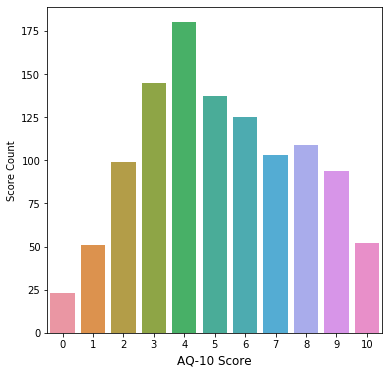

In [3]:
plt.figure(figsize=(6,6))
sns.countplot(x='Score', data=df)
plt.xlabel("AQ-10 Score", fontsize=12)
plt.ylabel("Score Count")

Text(0, 0.5, 'Gender Count')

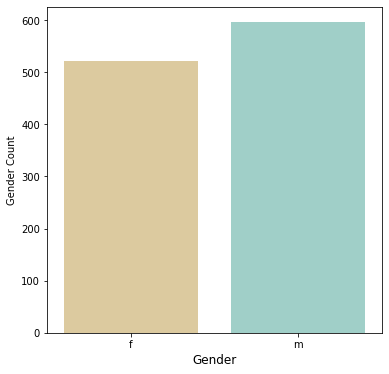

In [4]:
plt.figure(figsize=(6,6))
sns.countplot(x='Sex', data=df, palette = "BrBG")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Gender Count")

Text(0, 0.5, 'Residence Count')

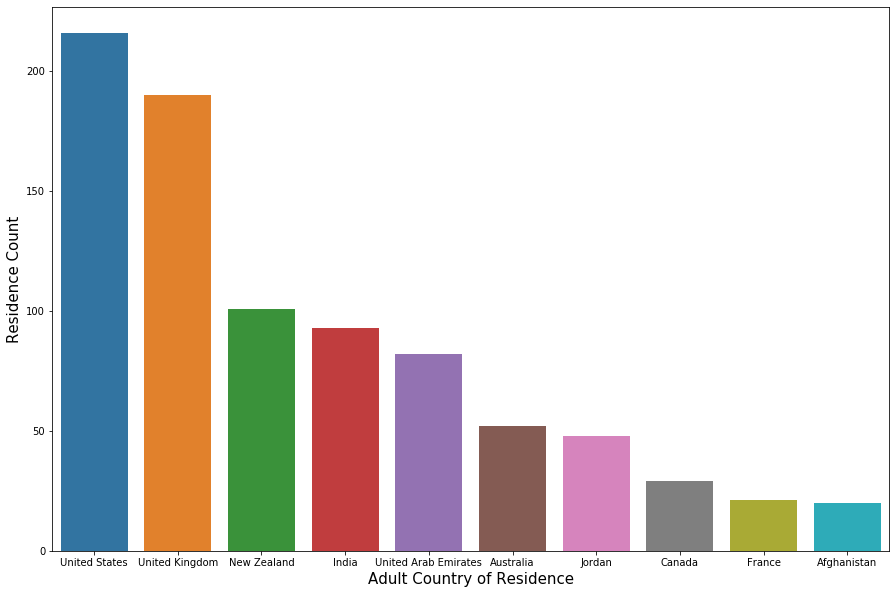

In [5]:
plt.figure(figsize=(15,10))
sns.countplot(x='Residence', data=df,order=pd.value_counts(df['Residence']).iloc[:10].index)
plt.xlabel("Adult Country of Residence",fontsize=15)
plt.ylabel("Residence Count",fontsize=15)

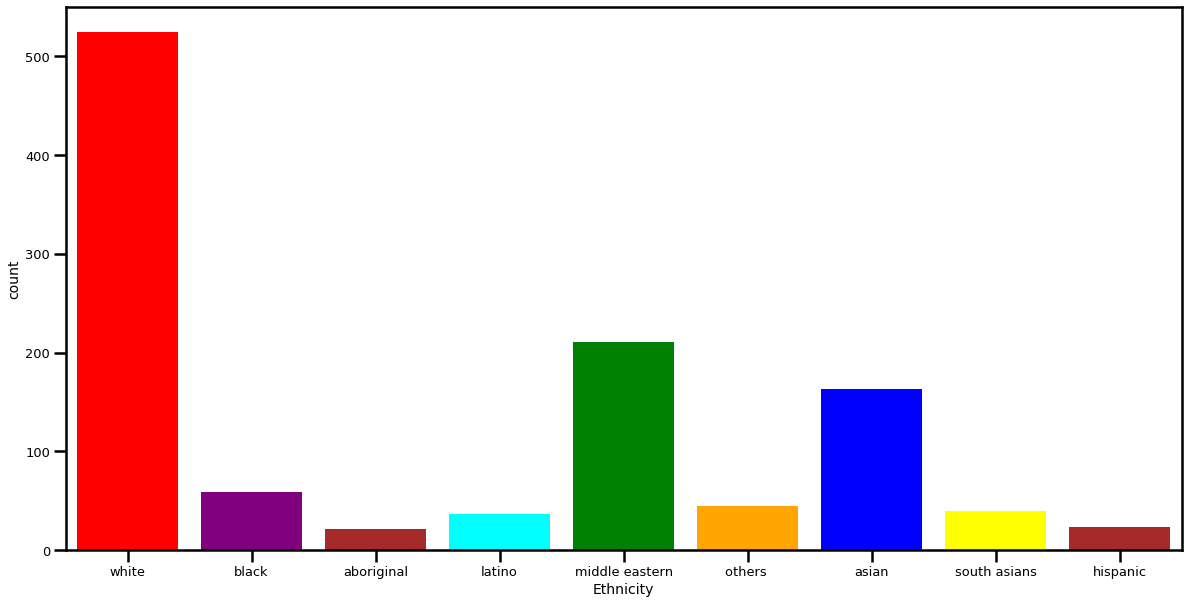

In [112]:
plt.figure(figsize=(20,10))
plt.xlabel("Adult Ethnicity", fontsize=14)
plt.ylabel("Ethnicty Count", fontsize=14)
sns.set_context("poster",font_scale= .59)
ax = sns.countplot(x='Ethnicity', data=df)
for bar in ax.patches:
    if bar.get_height() > 300:
        bar.set_color('red') 
        
    elif bar.get_height() > 200:
        bar.set_color('green') 
        
    elif bar.get_height() > 150:
        bar.set_color('blue') 
        
    elif bar.get_height() > 55:
        bar.set_color('purple')
        
    elif bar.get_height() > 49:
        bar.set_color('purple') 
        
    elif bar.get_height() > 40:
        bar.set_color('orange')
        
    elif bar.get_height() > 38:
        bar.set_color('yellow') 
        
    elif bar.get_height() > 30:
        bar.set_color('cyan')
        
    elif bar.get_height() > 8:
        bar.set_color('brown') 
        
    elif bar.get_height() > 5:
        bar.set_color('coral') 
        
    else:
        bar.set_color('grey')

Text(0.5, 0, 'Adult Age')

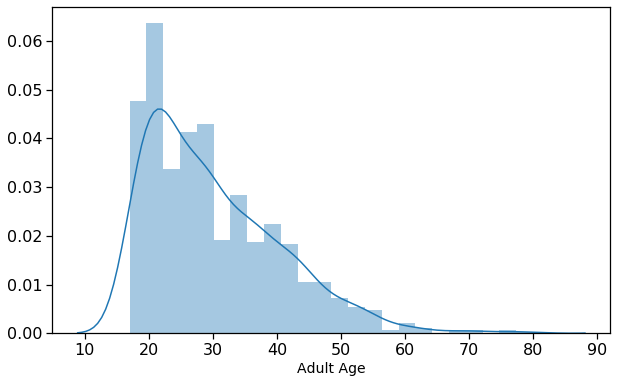

In [23]:
plt.figure(figsize=(10,6))
sns.set_context(font_scale= 10)
sns.distplot(df.Age)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Adult Age", fontsize=14)

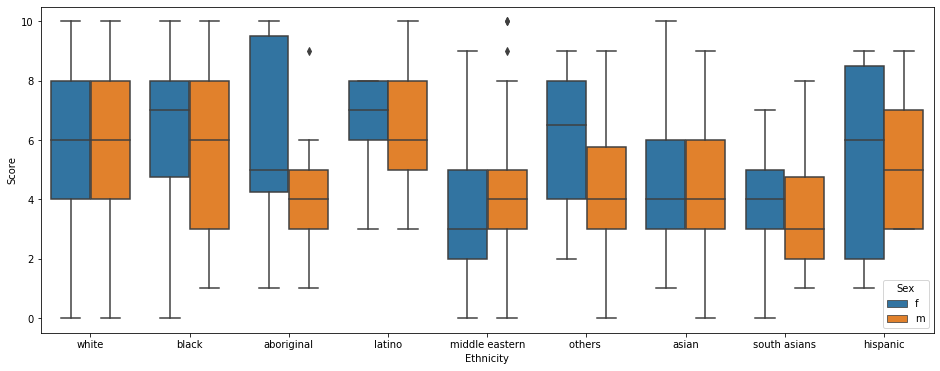

In [7]:
plt.figure(figsize=(16,6))
sns.boxplot(x="Ethnicity", y ="Score",hue="Sex",data=df)

In [3]:
#recoding gender
conditions = [
    (df['Sex'] == 'f') ,
     (df['Sex'] != 'f' )]
choices = [1,0]
df['female'] = np.select(conditions, choices, default=np.nan)

conditions = [
    (df['Sex'] == 'f') ,
     (df['Sex'] != 'f' )]
choices = [0,1]
df['male'] = np.select(conditions, choices, default=np.nan)


#recoding for diagnosis threshold
conditions = [
    (df['Class'] == 'YES') ,
     (df['Class'] == 'NO')]
choices = [1,0]
df['Class'] = np.select(conditions, choices, default=np.nan)


#recoding for diagnosis threshold
conditions = [
    (df['Family_ASD'] == 'YES') ,
     (df['Family_ASD'] == 'NO')]
choices = [1,0]
df['Family_ASD'] = np.select(conditions, choices, default=np.nan)

#recoding for white vs non white and asian cohorts
df['white'] = \
   (df['Ethnicity'] == "white") 
df.white = df.white.astype(int)

del df['Screening_Type']
del df['User']

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

model = glm("Class ~ white",data = df,family=sm.families.Binomial())

results = model.fit()
pd.set_option('display.float_format', '{:.4f}'.format)
print(results.summary())
print(round(np.exp(results.params),3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 1118
Model:                            GLM   Df Residuals:                     1116
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -668.85
Date:                Thu, 30 Apr 2020   Deviance:                       1337.7
Time:                        11:15:43   Pearson chi2:                 1.12e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2922      0.100    -12.949      0.0

In [10]:
model = glm("Class ~ female",data = df,family=sm.families.Binomial())

results = model.fit()
pd.set_option('display.float_format', '{:.4f}'.format)
print(results.summary())
print(round(np.exp(results.params),3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 1118
Model:                            GLM   Df Residuals:                     1116
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -698.39
Date:                Thu, 30 Apr 2020   Deviance:                       1396.8
Time:                        11:15:48   Pearson chi2:                 1.12e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8941      0.090     -9.907      0.0

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

model = glm("Class ~ male:C(Ethnicity)",data = df,family=sm.families.Binomial())

results1 = model.fit()
pd.set_option('display.float_format', '{:.4f}'.format)
print(results1.summary())
print(round(np.exp(results1.params),3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 1117
Model:                            GLM   Df Residuals:                     1107
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -664.89
Date:                Wed, 13 May 2020   Deviance:                       1329.8
Time:                        08:25:26   Pearson chi2:                 1.12e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

model = glm("Class ~ C(Ethnicity)",data = df,family=sm.families.Binomial())

results2 = model.fit()
pd.set_option('display.float_format', '{:.4f}'.format)
print(results2.summary())
print(round(np.exp(results2.params),3))


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 1117
Model:                            GLM   Df Residuals:                     1108
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -634.40
Date:                Wed, 13 May 2020   Deviance:                       1268.8
Time:                        08:25:31   Pearson chi2:                 1.12e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [6]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Autism_Data_Adult_Version-2.csv",encoding = 'latin')

#recoding for white vs non white  cohort
df['white'] = \
   ((df['Ethnicity'] == "white")  & (df['Sex'] == 'm'))
df.white = df.white.astype(int)

del df['Screening_Type']
del df['User']
del df['Jaundice ']
del df['Residence']
del df['Ethnicity']
del df['Language']
del df['Why_taken_the_screening ']
del df['Case_No']
del df['Family_ASD']
del df['Sex']
del df['Used_App_Before']
del df['Class']
del df['Age']

In [7]:
y=df['white']
X=df.drop(['white'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Score
0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,10
2,1,1,0,1,1,0,0,1,0,0,5
3,1,0,0,0,1,1,1,1,1,1,7
4,1,1,1,0,0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
1113,0,1,1,0,0,0,0,0,0,0,2
1114,1,1,1,1,1,1,1,1,1,1,10
1115,1,0,0,0,0,0,1,1,1,1,5
1116,1,1,0,1,1,1,0,1,0,1,7


In [8]:
import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dense, Activation, Dropout,BatchNormalization
opt = SGD(lr = .001, decay=1e-6, momentum=0.9, nesterov=True)

model = Sequential()
model.add(Dense(70, input_dim=11, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.4))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.4))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.4))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.4))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(2, activation='softmax')) 
                                            

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization

# Fitting the NN to the Training set
model.fit(X_train, pd.get_dummies(y_train), batch_size=20,validation_data=(X_test,pd.get_dummies(y_test)),\
          epochs = 2000, verbose=0, callbacks=[es,mc])


C:\Users\zacha\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 00894: early stopping


In [65]:
# Does substantially better than model without new terrorism variable

# using predict_classes() for multi-class data to return predicted class index.

prediction_index=model.predict_classes((X_test))

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))


model_eval_metrics( y_test,predicted_labels,classification="TRUE")


,accuracy,f1_score,precision,recall
0,0.778571,0.437751,0.389286,0.5


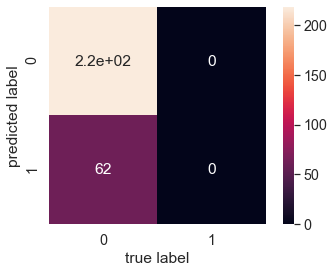

In [66]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, predicted_labels)
sns.heatmap(mat, square=True, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [9]:
df = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Autism_Data_Adult_Version-2.csv",encoding = 'latin')
from sklearn.model_selection import train_test_split

#recoding for white vs non white and asian cohorts
df['white'] = \
  ((df['Ethnicity'] == "white")  & (df['Sex'] == 'm'))
df.white = df.white.astype(int)

del df['Screening_Type']
del df['User']
del df['Jaundice ']
del df['Residence']
del df['Ethnicity']
del df['Language']
del df['Why_taken_the_screening ']
del df['Case_No']
del df['Family_ASD']
del df['Sex']
del df['Used_App_Before']
del df['Class']
del df['Age']


from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

y=df['white']
X=df.drop(['white'],axis=1)

from imblearn.over_sampling import SVMSMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

smote = SVMSMOTE( sampling_strategy='auto')
sm_X, sm_y= smote.fit_sample(X_train, y_train)

In [10]:
import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dense, Activation, Dropout,BatchNormalization
opt = SGD(lr = .01, decay=1e-6, momentum=0.5, nesterov=True)

model = Sequential()
model.add(Dense(60, input_dim=11, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.3))
model.add(Dense(60, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.3))
model.add(Dense(60, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.3))
model.add(Dense(60, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.3))
model.add(Dense(2, activation='softmax')) 
                                            

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization

# Fitting the NN to the Training set
model.fit(sm_X, pd.get_dummies(sm_y), batch_size=25,validation_data=(X_test,pd.get_dummies(y_test)),\
          epochs = 2000, verbose=0, callbacks=[es,mc])


C:\Users\zacha\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 00545: early stopping


In [66]:
prediction_index=model.predict_classes((X_test))

labels=pd.get_dummies(y_train).columns

predicted_labels=list(map(lambda x: labels[x], prediction_index))

model_eval_metrics( y_test,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall
0,0.678571,0.590244,0.587121,0.608908


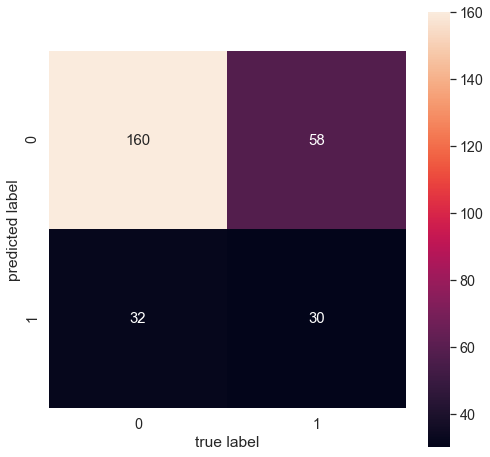

In [67]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,8))
mat = confusion_matrix(y_test, predicted_labels)
sns.set(font_scale=1.3)
sns.heatmap(mat, square=True, annot=True,annot_kws={"size": 15},fmt='g')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [68]:
print(pd.Series(y_test).value_counts())

0    218
1     62
Name: white, dtype: int64


In [101]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Autism_Data_Adult_Version-2.csv",encoding = 'latin')


#recoding for white vs non white and asian cohorts
df['white'] = \
  ((df['Ethnicity'] == "white"))
df.white = df.white.astype(int)

del df['Screening_Type']
del df['User']
del df['Jaundice ']
del df['Residence']
del df['Ethnicity']
del df['Language']
del df['Why_taken_the_screening ']
del df['Case_No']
del df['Family_ASD']
del df['Sex']
del df['Used_App_Before']
del df['Class']
del df['Age']
del df['Score']


In [59]:
dfmini = df.groupby('white').agg(['mean'])
dfmini

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
white,,,,,,,,,,
0,0.7339,0.4560,0.4713,0.5299,0.5088,0.3001,0.4291,0.6401,0.3423,0.6002
1,0.7585,0.5849,0.6226,0.5660,0.5623,0.4075,0.4906,0.6755,0.4528,0.6264


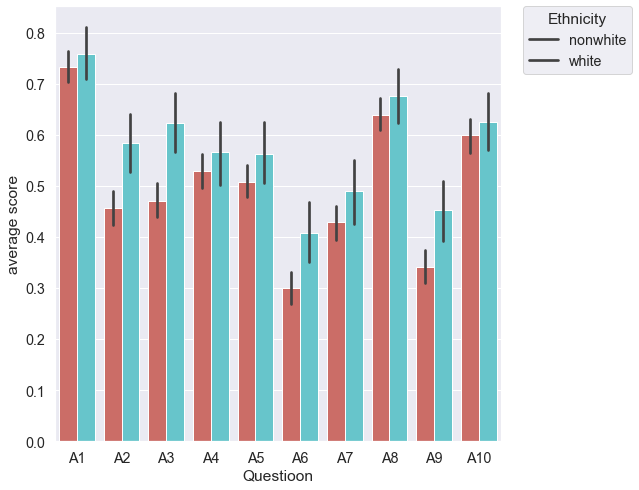

In [54]:
df_long = pd.melt(df, "white", var_name="A", value_name="average score")
plt.figure(figsize=(8,8))
ax = sns.barplot(x="A", hue="white", y="average score", data=df_long,ci=95,palette="hls")
ax.set(xlabel='Questioon', ylabel='average score')
plt.legend(title = "Ethnicity", labels = ['nonwhite','white'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Autism_Data_Adult_Version-2.csv",encoding = 'latin')


#recoding for white vs non white and asian cohorts
df['white'] = \
  ((df['Ethnicity'] == "white"))
df.white = df.white.astype(int)

del df['Screening_Type']
del df['User']
del df['Jaundice ']
del df['Residence']
del df['Ethnicity']
del df['Language']
del df['Why_taken_the_screening ']
del df['Case_No']
del df['Family_ASD']
del df['Sex']
del df['Used_App_Before']
del df['Class']
del df['Age']
del df['Score']




In [62]:
dfmini2 = df.groupby('white').agg(['mean'])
dfmini2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
white,,,,,,,,,,
0,0.6886,0.4158,0.4293,0.4545,0.4781,0.2424,0.4158,0.6515,0.2862,0.5539
1,0.7977,0.5668,0.5954,0.6336,0.5706,0.4198,0.4752,0.6450,0.4618,0.6660


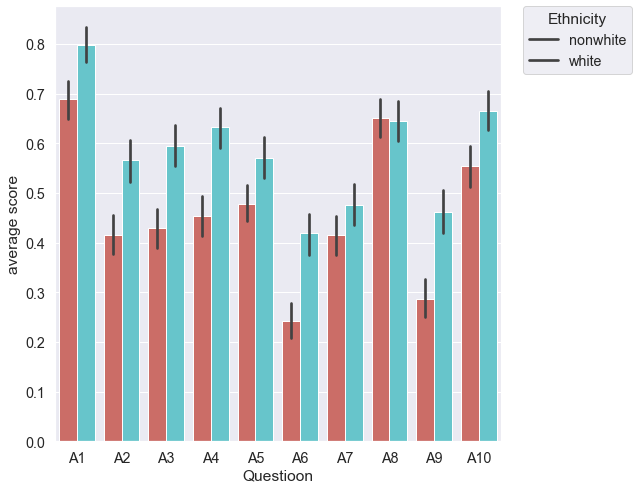

In [56]:
df_long = pd.melt(df, "white", var_name="A", value_name="average score")
plt.figure(figsize=(8,8))
ax = sns.barplot(x="A", hue="white", y="average score", data=df_long,ci=95,palette="hls")
ax.set(xlabel='Questioon', ylabel='average score')
plt.legend(title = "Ethnicity", labels = ['nonwhite','white'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [71]:
df = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Autism_Data_Adult_Version-2.csv",encoding = 'latin')


#recoding for white vs non white and asian cohorts
df['white'] = \
   ((df['Ethnicity'] == "white"))
df.white = df.white.astype(int)


del df['Screening_Type']
del df['User']
del df['Jaundice ']
del df['Residence']
del df['white']
del df['Language']
del df['Why_taken_the_screening ']
del df['Case_No']
del df['Family_ASD']
del df['Sex']
del df['Used_App_Before']
del df['Class']
del df['Age']

df.Ethnicity = df.Ethnicity.astype(str)
df = df.loc[df['Ethnicity'] != "nan"]

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Ethnicity'] = labelencoder.fit_transform(df['Ethnicity'])


y=df['Ethnicity']
X=df.drop(['Ethnicity'],axis=1)

In [72]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

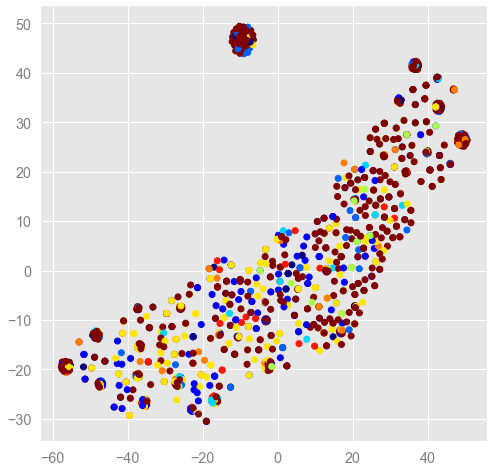

In [74]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)

transformed = model.fit_transform(X)

xs = transformed[:,0]
ys = transformed[:,1]

plt.figure(figsize=(8,8))
plt.scatter(xs,ys,c=y, cmap=plt.cm.get_cmap('jet', 10))
plt.show()

In [75]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(X)

In [76]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='black')
plt.rc('ytick', direction='out', color='black')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=6)

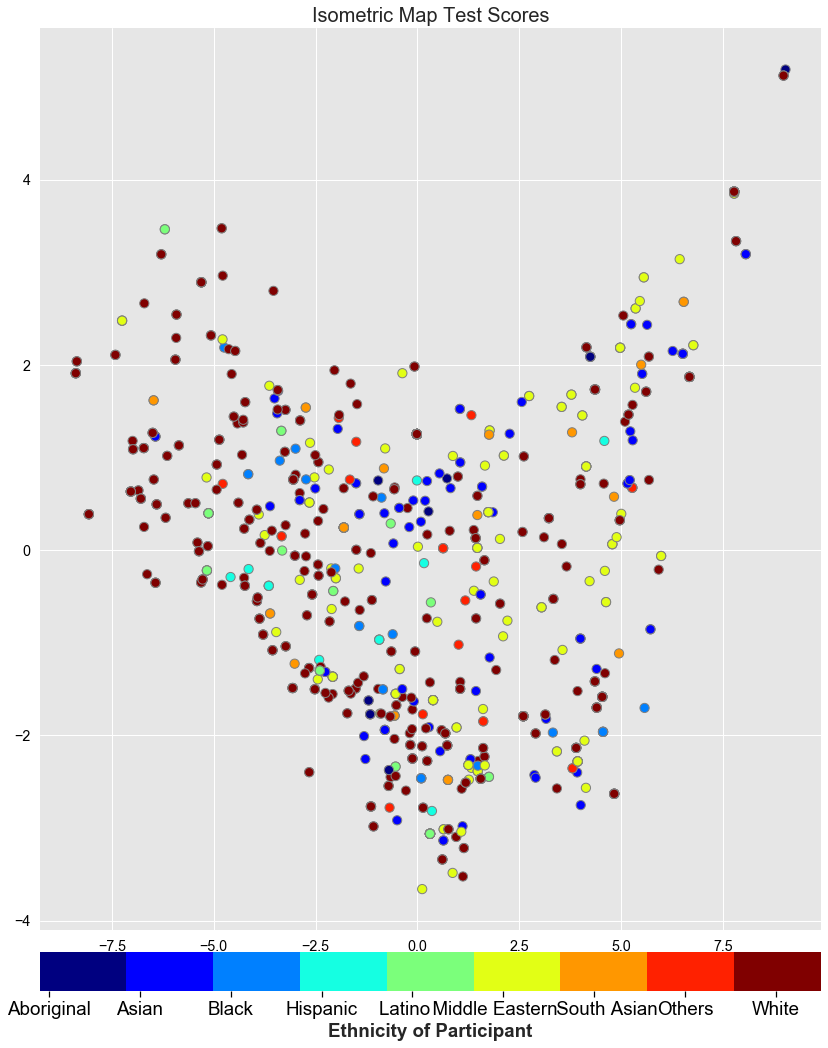

In [77]:
plt.figure(figsize=(14,20))
plt.scatter(proj[:, 0], proj[:, 1], c=y, cmap=plt.cm.get_cmap('jet', 9),edgecolor='grey',s=85)
cbar = plt.colorbar(orientation="horizontal", pad=.02)
plt.clim(-.1,8.5)
cbar.set_ticks(range(9))
cbar.set_ticklabels(['Aboriginal', 'Asian', 'Black', 'Hispanic', 'Latino   ', '  Middle Eastern     ', '     South Asian', 'Others', 'White'])
cbar.ax.tick_params(labelsize='large')
plt.title('Isometric Map Test Scores', fontsize=20)
cbar.set_label(label='Ethnicity of Participant', size='large', weight='bold')

In [21]:
dfc = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Toddler-dataset-June-data-1-1.csv",sep = ';')

Text(0, 0.5, 'Score Count')

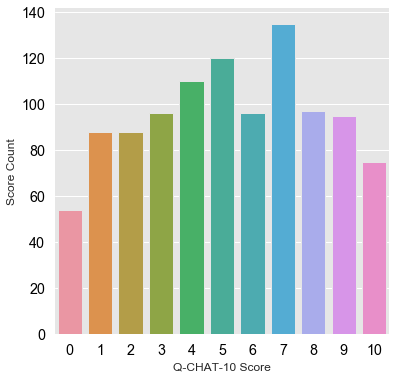

In [79]:
plt.figure(figsize=(6,6))
sns.countplot(x='Score', data=dfc)
plt.xlabel("Q-CHAT-10 Score", fontsize=12)
plt.ylabel("Score Count", fontsize=12)

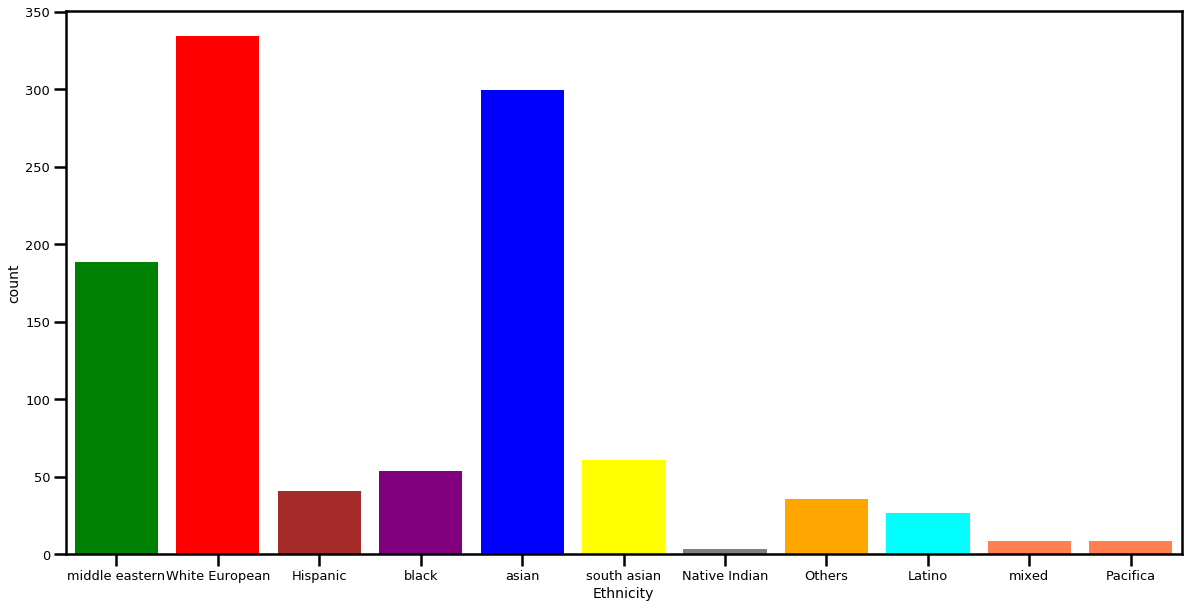

In [93]:
plt.figure(figsize=(20,10))
plt.xlabel("ToddlerEthnicity", fontsize=14)
plt.ylabel("Ethnicty Count", fontsize=14)
sns.set_context("poster",font_scale= .59)
ax = sns.countplot(x='Ethnicity', data=dfc)
for bar in ax.patches:
    if bar.get_height() > 300:
        bar.set_color('red') 
        
    elif bar.get_height() > 250:
        bar.set_color('blue') 
        
    elif bar.get_height() > 150:
        bar.set_color('green') 
        
    elif bar.get_height() > 55:
        bar.set_color('yellow')
        
    elif bar.get_height() > 49:
        bar.set_color('purple') 
        
    elif bar.get_height() > 35:
        bar.set_color('brown')
        
    elif bar.get_height() > 29:
        bar.set_color('orange') 
        
    elif bar.get_height() > 10:
        bar.set_color('cyan')
        
    elif bar.get_height() > 8:
        bar.set_color('pink') 
        
    elif bar.get_height() > 5:
        bar.set_color('coral') 
        
    else:
        bar.set_color('grey')

Text(0, 0.5, 'Gender Count')

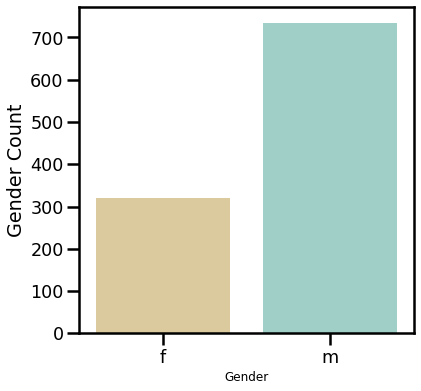

In [56]:
plt.figure(figsize=(6,6))
sns.countplot(x='Sex', data=dfc, palette = "BrBG")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Gender Count")

Text(0.5, 0, 'Toddler Age')

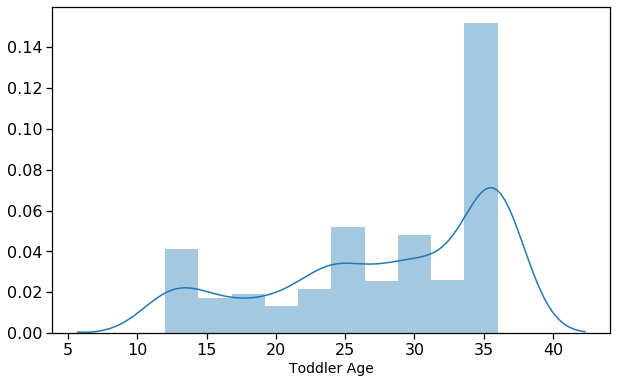

In [26]:
plt.figure(figsize=(10,6))
sns.set_context(font_scale= 10)
sns.distplot(dfc.Age_Mons)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Toddler Age", fontsize=14)

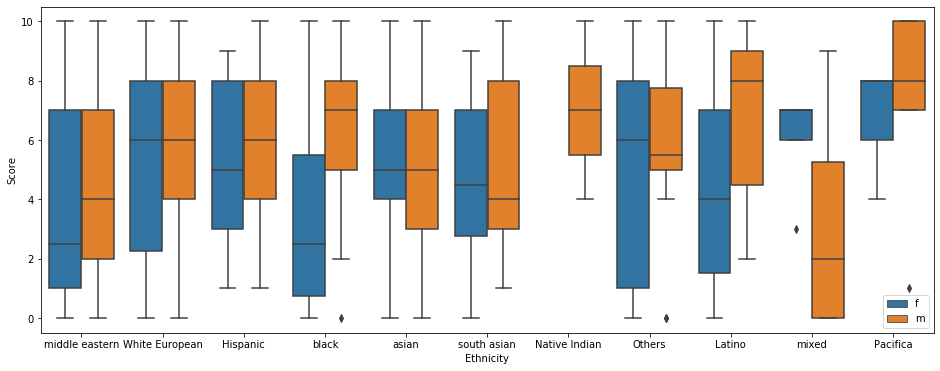

In [25]:
plt.figure(figsize=(16,6))
g = sns.boxplot(x="Ethnicity", y ="Score",hue="Sex",data=dfc)
g.legend( loc='lower right');

In [7]:
from sklearn.model_selection import train_test_split
dfc1 = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Toddler-dataset-June-data-1-1.csv",sep = ';')

#recoding gender
conditions = [
    (dfc1['Sex'] == 'f') ,
     (dfc1['Sex'] != 'f' )]
choices = [1,0]
dfc1['female'] = np.select(conditions, choices, default=np.nan)

#recoding gender
conditions = [
    (dfc1['Sex'] == 'm') ,
     (dfc1['Sex'] != 'm' )]
choices = [1,0]
dfc1['male'] = np.select(conditions, choices, default=np.nan)




#recoding for white vs non white and asian cohorts
dfc1['white'] = \
   (dfc1['Ethnicity'] == "White European") 
dfc1.white = dfc1.white.astype(int)

#recoding jaundice
conditions = [
    (dfc1['Jaundice'] == 'yes') ,
     (dfc1['Jaundice'] == 'no' )]
choices = [1,0]
dfc1['Jaundice'] = np.select(conditions, choices, default=np.nan)

conditions = [
    (dfc1['Class'] == 'Yes') ,
     (dfc1['Class'] == 'No')]
choices = [1,0]
dfc1['Class'] = np.select(conditions, choices, default=np.nan)
 
#recoding family
conditions = [
    (dfc1['Family_ASD'] == 'yes') ,
     (dfc1['Family_ASD'] == 'no' )]
choices = [1,0]
dfc1['Family_ASD'] = np.select(conditions, choices, default=np.nan)


In [93]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

model = glm("Class ~ white",data = dfc1,family=sm.families.Binomial())

results = model.fit()
pd.set_option('display.float_format', '{:.4f}'.format)
print(results.summary())
print(round(np.exp(results.params),3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 1054
Model:                            GLM   Df Residuals:                     1052
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -648.03
Date:                Thu, 30 Apr 2020   Deviance:                       1296.1
Time:                        11:41:20   Pearson chi2:                 1.05e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6807      0.079      8.628      0.0

In [94]:
model = glm("Class ~ female",data = dfc1,family=sm.families.Binomial())

results = model.fit()
pd.set_option('display.float_format', '{:.4f}'.format)
print(results.summary())
print(round(np.exp(results.params),3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 1054
Model:                            GLM   Df Residuals:                     1052
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -644.80
Date:                Thu, 30 Apr 2020   Deviance:                       1289.6
Time:                        11:41:33   Pearson chi2:                 1.05e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9771      0.083     11.808      0.0

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

model = glm("Class ~ male:C(Ethnicity)",data = dfc1,family=sm.families.Binomial())

results3 = model.fit()
pd.set_option('display.float_format', '{:.4f}'.format)
print(result3.summary())
print(round(np.exp(results3.params),3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 1054
Model:                            GLM   Df Residuals:                     1042
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -628.41
Date:                Wed, 13 May 2020   Deviance:                       1256.8
Time:                        08:26:07   Pearson chi2:                 1.05e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

model = glm("Class ~ female:C(Ethnicity)",data = dfc1,family=sm.families.Binomial())

results4 = model.fit()
pd.set_option('display.float_format', '{:.4f}'.format)
print(results4.summary())
print(round(np.exp(results4.params),3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 1054
Model:                            GLM   Df Residuals:                     1043
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -628.27
Date:                Wed, 13 May 2020   Deviance:                       1256.5
Time:                        08:26:19   Pearson chi2:                 1.05e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [11]:
from sklearn.model_selection import train_test_split
dfc1 = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Toddler-dataset-June-data-1-1.csv",sep = ';')



#recoding for white vs non white and asian cohorts
dfc1['white'] = \
   ((dfc1['Ethnicity'] == "White European") & (dfc1['Sex'] == 'm'))
dfc1.white = dfc1.white.astype(int)


#drop unecesary information
del dfc1['Sex']
del dfc1['Who_completed_the_test']
del dfc1['Ethnicity']
del dfc1['Jaundice']
del dfc1['Family_ASD']
del dfc1['Class']
del dfc1['Age_Mons']

y=dfc1['white']
X=dfc1.drop(['white'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dense, Activation, Dropout,BatchNormalization
opt = SGD(lr = .001, decay=1e-6, momentum=0.5, nesterov=True)

model = Sequential()
model.add(Dense(70, input_dim=11, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.3))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.3))
model.add(Dense(2, activation='softmax')) 
                                            

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization

# Fitting the NN to the Training set
model.fit(X_train, pd.get_dummies(y_train), batch_size=25,validation_data=(X_test,pd.get_dummies(y_test)),\
          epochs = 2000, verbose=0, callbacks=[es,mc])


C:\Users\zacha\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


In [47]:
prediction_index=model.predict_classes((X_test))

labels=pd.get_dummies(y_train).columns

predicted_labels=list(map(lambda x: labels[x], prediction_index))

model_eval_metrics( y_test,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall
0,0.80303,0.445378,0.401515,0.5


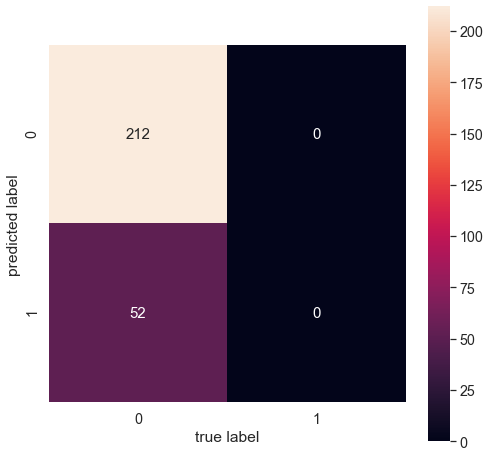

In [48]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,8))
mat = confusion_matrix(y_test, predicted_labels)
sns.set(font_scale=1.3)
sns.heatmap(mat, square=True, annot=True,annot_kws={"size": 15},fmt='g')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [13]:
from sklearn.model_selection import train_test_split
dfc1 = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Toddler-dataset-June-data-1-1.csv",sep = ';')



#recoding for white vs non white and asian cohorts
dfc1['white'] = \
   ((dfc1['Ethnicity'] == "White European") & (dfc1['Sex'] == 'm'))
dfc1.white = dfc1.white.astype(int)


#drop unecesary information
del dfc1['Sex']
del dfc1['Who_completed_the_test']
del dfc1['Ethnicity']
del dfc1['Jaundice']
del dfc1['Family_ASD']
del dfc1['Class']
del dfc1['Age_Mons']

y=dfc1['white']
X=dfc1.drop(['white'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from imblearn.over_sampling import SVMSMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

smote = SVMSMOTE( sampling_strategy='auto')
sm_X, sm_y= smote.fit_sample(X_train, y_train)

In [24]:
import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dense, Activation, Dropout,BatchNormalization
opt = SGD(lr = .0001, decay=1e-6, momentum=0.8, nesterov=True)

model = Sequential()
model.add(Dense(70, input_dim=11, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.4))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.4))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.4))
model.add(Dense(70, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.4))
model.add(Dense(2, activation='softmax')) 
                                            

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization

# Fitting the NN to the Training set
model.fit(sm_X, pd.get_dummies(sm_y), batch_size=25,validation_data=(X_test,pd.get_dummies(y_test)),\
          epochs = 2000, verbose=0, callbacks=[es,mc])


C:\Users\zacha\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


In [25]:
prediction_index=model.predict_classes((X_test))

labels=pd.get_dummies(y_train).columns

predicted_labels=list(map(lambda x: labels[x], prediction_index))

model_eval_metrics( y_test,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall
0,0.715909,0.560459,0.55933,0.561865


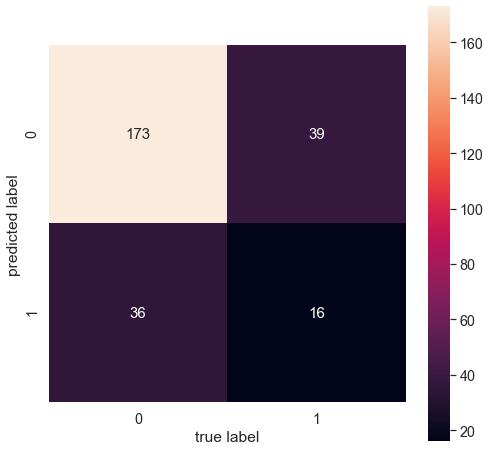

In [26]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,8))
mat = confusion_matrix(y_test, predicted_labels)
sns.set(font_scale=1.3)
sns.heatmap(mat, square=True, annot=True,annot_kws={"size": 15},fmt='g')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
dfc1 = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Toddler-dataset-June-data-1-1.csv",sep = ';')



#recoding for white vs non white and asian cohorts
dfc1['white'] = \
   ((dfc1['Ethnicity'] == "White European")  & (dfc1['Sex'] == 'm'))
dfc1.white = dfc1.white.astype(int)


#drop unecesary information
del dfc1['Sex']
del dfc1['Who_completed_the_test']
del dfc1['Ethnicity']
del dfc1['Jaundice']
del dfc1['Family_ASD']
del dfc1['Class']
del dfc1['Age_Mons']
del dfc1['Score']

In [18]:
dfcmini = dfc1.groupby('white').agg(['mean'])
dfcmini

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Score
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
white,,,,,,,,,,,
0,0.529484,0.431204,0.393120,0.497543,0.495086,0.554054,0.636364,0.445946,0.468059,0.58231,5.033170
1,0.679167,0.508333,0.429167,0.562500,0.625000,0.654167,0.695833,0.504167,0.562500,0.60000,5.820833


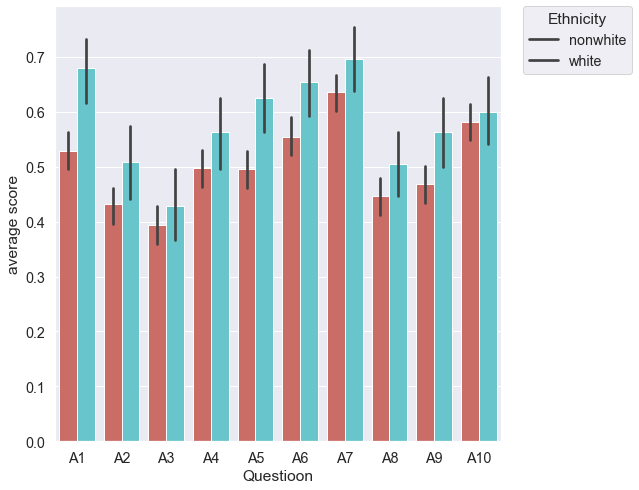

In [20]:
df_long = pd.melt(dfc1, "white", var_name="A", value_name="average score")
plt.figure(figsize=(8,8))
ax = sns.barplot(x="A", hue="white", y="average score", data=df_long,ci=95,palette="hls")
ax.set(xlabel='Questioon', ylabel='average score')
plt.legend(title = "Ethnicity", labels = ['nonwhite','white'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
dfc1 = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Toddler-dataset-June-data-1-1.csv",sep = ';')



#recoding for white vs non white and asian cohorts
dfc1['white'] = \
   ((dfc1['Ethnicity'] == "White European"))


#drop unecesary information
del dfc1['Sex']
del dfc1['Who_completed_the_test']
del dfc1['Ethnicity']
del dfc1['Jaundice']
del dfc1['Family_ASD']
del dfc1['Class']
del dfc1['Age_Mons']
del dfc1['Score']

In [23]:
dfc1mini2 = dfc1.groupby('white').agg(['mean'])
dfc1mini2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Score
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
white,,,,,,,,,,,
False,0.526389,0.418056,0.387500,0.486111,0.504167,0.543056,0.625000,0.454167,0.466667,0.568056,4.979167
True,0.643713,0.514970,0.431138,0.568862,0.568862,0.649701,0.703593,0.470060,0.538922,0.625749,5.715569


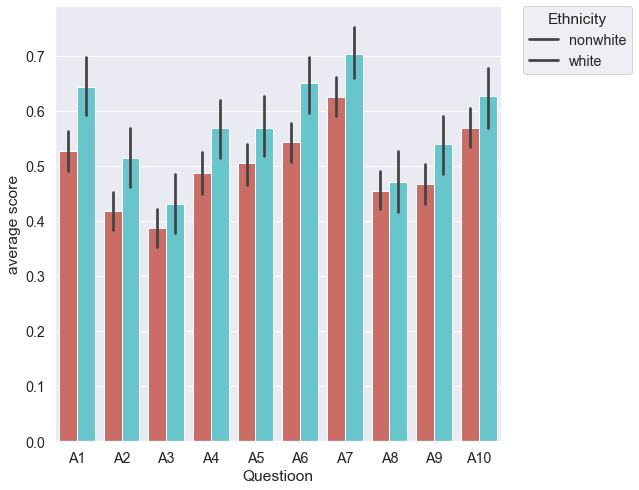

In [25]:
df_long = pd.melt(dfc1, "white", var_name="A", value_name="average score")
plt.figure(figsize=(8,8))
ax = sns.barplot(x="A", hue="white", y="average score", data=df_long,ci=95,palette="hls")
ax.set(xlabel='Questioon', ylabel='average score')
plt.legend(title = "Ethnicity", labels = ['nonwhite','white'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
dfc1 = pd.read_csv("C:/Users/zacha/Desktop/Autism Thesis/Toddler-dataset-June-data-1-1.csv",sep = ';')



#drop unecesary information
del dfc1['Sex']
del dfc1['Who_completed_the_test']
del dfc1['Jaundice']
del dfc1['Family_ASD']
del dfc1['Class']
del dfc1['Age_Mons']

dfc1.Ethnicity = dfc1.Ethnicity.astype(str)
dfc1 = dfc1.loc[dfc1['Ethnicity'] != "nan"]

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dfc1['Ethnicity'] = labelencoder.fit_transform(dfc1['Ethnicity'])

y=dfc1['Ethnicity']
X=dfc1.drop(['Ethnicity'],axis=1)

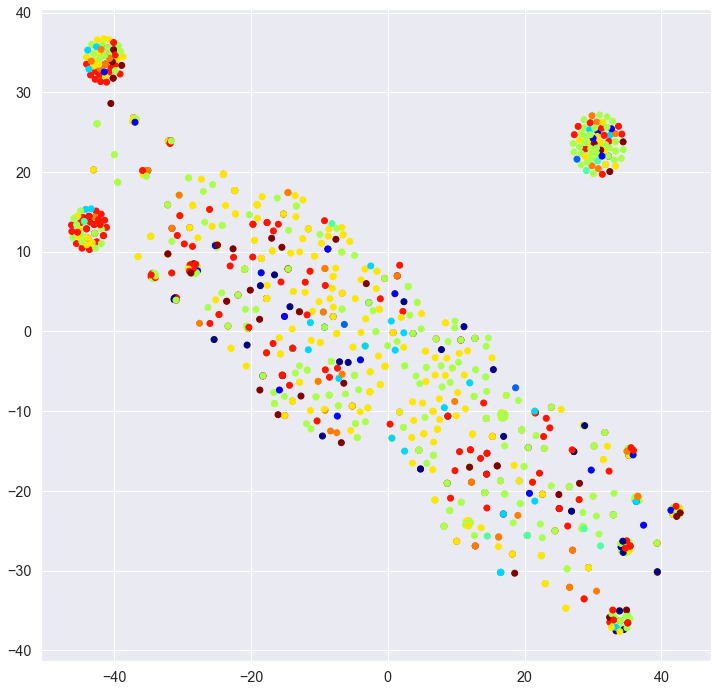

In [27]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)

transformed = model.fit_transform(X)

xs = transformed[:,0]
ys = transformed[:,1]

plt.figure(figsize=(12,12))
plt.scatter(xs,ys,c=y, cmap=plt.cm.get_cmap('jet', 10))
plt.show()


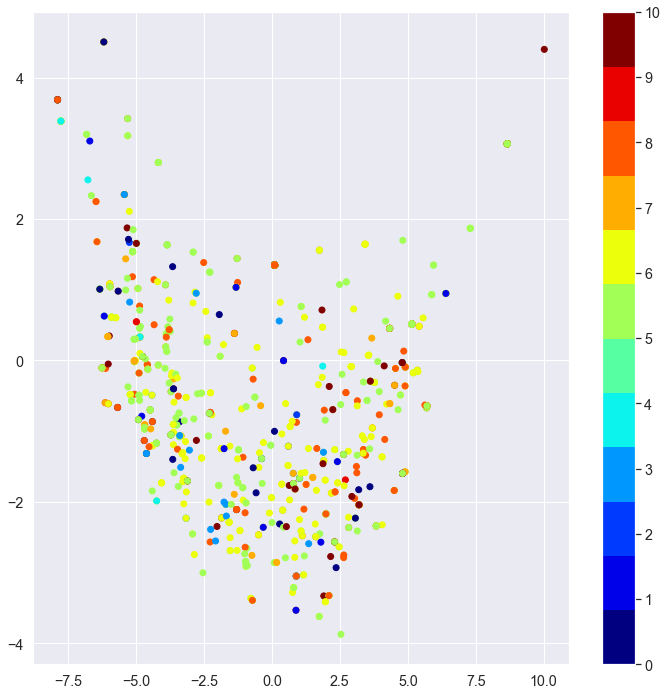

In [29]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(X)
plt.figure(figsize=(12,12))
plt.scatter(proj[:, 0], proj[:, 1], c=y, cmap=plt.cm.get_cmap('jet', 12))
plt.colorbar(ticks=range(12))
plt.clim(0, 10);

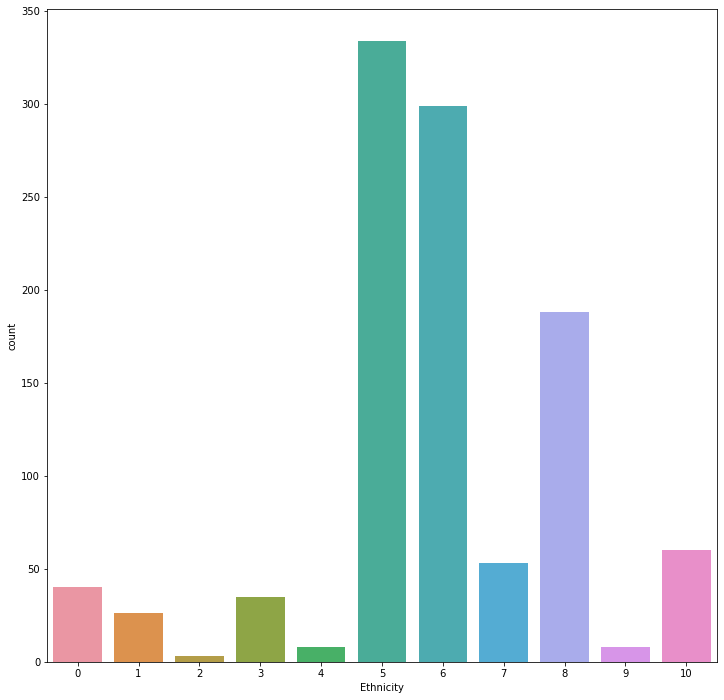

In [23]:
plt.figure(figsize=(12,12))
sns.countplot(x='Ethnicity', data=dfc1)

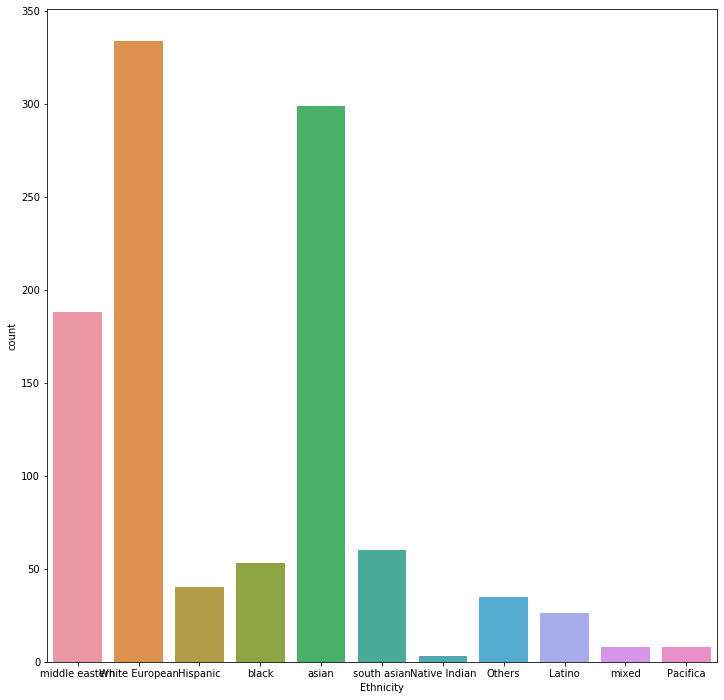

In [25]:
plt.figure(figsize=(12,12))
sns.countplot(x='Ethnicity', data=dfc)

In [ ]:
df1 = df.loc[df['Sex'] != "f"]

In [15]:
print("Toddler Females")
print(round(np.exp(results4.params),3))
print("Toddler Males")
print(round(np.exp(results3.params),3))

Toddler Females
Intercept                                     2.6570
female:C(Ethnicity)[Hispanic]                 0.7530
female:C(Ethnicity)[Latino]                   0.6590
female:C(Ethnicity)[Native Indian]            1.0000
female:C(Ethnicity)[Others]                   0.8470
female:C(Ethnicity)[Pacifica]         874337992.3990
female:C(Ethnicity)[White European]           0.8440
female:C(Ethnicity)[asian]                    1.1510
female:C(Ethnicity)[black]                    0.1710
female:C(Ethnicity)[middle eastern]           0.2510
female:C(Ethnicity)[mixed]                    1.1290
female:C(Ethnicity)[south asian]              0.5650
dtype: float64
Toddler Males
Intercept                                    1.5520
male:C(Ethnicity)[Hispanic]                  2.2090
male:C(Ethnicity)[Latino]                    4.1880
male:C(Ethnicity)[Native Indian]    1496693383.9550
male:C(Ethnicity)[Others]                    6.4430
male:C(Ethnicity)[Pacifica]                  2.5770
male:C(

In [16]:
print("Adult Females")
print(round(np.exp(results2.params),3))
print("Aduly Males")
print(round(np.exp(results1.params),3))

Adult Females
Intercept                        0.3130
C(Ethnicity)[T.asian]            0.5840
C(Ethnicity)[T.black]            2.9870
C(Ethnicity)[T.hispanic]         2.0570
C(Ethnicity)[T.latino]           3.5760
C(Ethnicity)[T.middle eastern]   0.4130
C(Ethnicity)[T.others ]          1.6550
C(Ethnicity)[T.south asians]     0.2670
C(Ethnicity)[T.white]            2.5030
dtype: float64
Aduly Males
Intercept                           0.5490
male:C(Ethnicity)[aboriginal]       0.1820
male:C(Ethnicity)[asian]            0.3110
male:C(Ethnicity)[black]            1.3930
male:C(Ethnicity)[hispanic]         0.9940
male:C(Ethnicity)[latino]           1.6700
male:C(Ethnicity)[middle eastern]   0.2160
male:C(Ethnicity)[others ]          0.4050
male:C(Ethnicity)[south asians]     0.2280
male:C(Ethnicity)[white]            1.2930
dtype: float64
